LAPD Crime dataset from 2020 to 2025

28 Columns:
0. DR_NO: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits
1. Date Rptd
2. DATE OCC
3. TIME OCC: 
4. AREA: The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
5. AREA NAME: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.
6. Rpt Dist No: A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. 
7. Part 1-2
8. Crm Cd: Indicates the crime committed. (Same as Crime Code 1)
9. Crm Cd Desc: Defines the Crime Code provided
10. Mocodes: 	
Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order.
11. Vict Age: Two character numeric
12. Vict Sex: F - Female M - Male X - Unknown
13. Vict Descent: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
14. Premis Cd: The type of structure, vehicle, or location where the crime took place.
15. Premis Desc: Defines the Premise Code provided.
16. Weapon Used Cd: The type of weapon used in the crime.
17. Weapon Desc: Defines the Weapon Used Code provided.
18. Status: Status of the case. (IC is the default)
19. Status Desc: Defines the Status Code provided.
20. Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
21. Crm Cd 2: May contain a code for an additional crime, less serious than Crime Code 1.
22. Crm Cd 3
23. Crm Cd 4
24. LOCATION: Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
25. Cross Street: Cross Street of rounded Address
27. LAT: Latitude
28. LON: Longtitude

Reference: https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data 

Steps:
1. Read csv data
2. Check null data
- Replace null value with X in "Vict Sex", "Vict Descent" and "Premis Desc" column
- Replace null with "CC" (match to UNK in "Status Desc") in "Status" column
- Remove column "AREA", "Mocodes", "Premis Cd", "Weapon Used Cd", "Weapon Desc","Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4" and "Cross Street" (too many null, data not useful)
3. Change data type:
- "Date Rptd" and "DATE OCC" to datetime 
- "TIME OCC" to time
- "AREA NAME", "Rpt Dist No", "Part 1-2", "Crm Cd", "Crm Cd Desc", "Vict Sex", "Vict Descent", "Premis Desc", "Status", "Status Desc" to category
4. Replace space with underscore in column names and convert to lowercase
5. Data visualization 


Extra:
- age can't be 0
- sex don't have h or - value 
- 2025 data is incomplete 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
crime_lapd = pd.read_csv("Crime_Data_from_2020_to_Present_20260131.csv")
crime_lapd.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,2021 Apr 11 12:00:00 AM,2020 Nov 07 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,2020 Oct 21 12:00:00 AM,2020 Oct 18 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,2024 Dec 10 12:00:00 AM,2020 Oct 30 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,2020 Dec 24 12:00:00 AM,2020 Dec 24 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,2020 Oct 03 12:00:00 AM,2020 Sep 29 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [4]:
crime_lapd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [29]:
# Replace null value with X in "Vict Sex", "Vict Descent" and "Premis Desc" column
crime_lapd["Vict Sex"] = crime_lapd["Vict Sex"].fillna("X")
crime_lapd["Vict Descent"] = crime_lapd["Vict Descent"].fillna("X")
crime_lapd["Premis Desc"] = crime_lapd["Premis Desc"].fillna("X")

# Replace null with "CC" in "Status" column
crime_lapd["Status"] = crime_lapd["Status"].fillna("CC")

# Remove columns that have too many null or not useful data
crime_lapd = crime_lapd.drop(["AREA", "Mocodes","Premis Cd", "Weapon Used Cd", "Weapon Desc", "Crm Cd 1",
                              "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Cross Street"], axis=1)

In [30]:
# Change data type to category
# "AREA NAME", "Rpt Dist No", "Part 1-2", "Crm Cd", "Crm Cd Desc", "Vict Sex", "Vict Descent", 
# "Premis Desc", "Status", "Status Desc"
crime_lapd["AREA NAME"] = crime_lapd["AREA NAME"].astype("category")
crime_lapd["Rpt Dist No"] = crime_lapd["Rpt Dist No"].astype("category")
crime_lapd["Part 1-2"] = crime_lapd["Part 1-2"].astype("category")
crime_lapd["Crm Cd"] = crime_lapd["Crm Cd"].astype("category")
crime_lapd["Crm Cd Desc"] = crime_lapd["Crm Cd Desc"].astype("category")
crime_lapd["Vict Sex"] = crime_lapd["Vict Sex"].astype("category")
crime_lapd["Vict Descent"] = crime_lapd["Vict Descent"].astype("category")
crime_lapd["Premis Desc"] = crime_lapd["Premis Desc"].astype("category")
crime_lapd["Status"] = crime_lapd["Status"].astype("category")
crime_lapd["Status Desc"] = crime_lapd["Status Desc"].astype("category")

# Convert "Date Rptd" and "DATE OCC" to datetime 
crime_lapd["Date Rptd"] = pd.to_datetime(crime_lapd["Date Rptd"])
crime_lapd["DATE OCC"] = pd.to_datetime(crime_lapd["DATE OCC"])

# Change TIME OCC to HH:MM
crime_lapd["TIME OCC"] = crime_lapd["TIME OCC"].astype(str).str.zfill(4)
crime_lapd["TIME OCC"] = crime_lapd["TIME OCC"].str[:2] + ':' + crime_lapd["TIME OCC"].str[2:]

# Combine into a single datetime
crime_lapd["DATE OCC"] = pd.to_datetime(crime_lapd["DATE OCC"].astype(str) + ' ' + crime_lapd["TIME OCC"])
crime_lapd = crime_lapd.drop(["TIME OCC"], axis=1)

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14184\2123663149.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_lapd["Date Rptd"] = pd.to_datetime(crime_lapd["Date Rptd"])
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14184\2123663149.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_lapd["DATE OCC"] = pd.to_datetime(crime_lapd["DATE OCC"])


In [31]:
# Replace space with underscore in column names and convert to lowercase
crime_lapd.columns = crime_lapd.columns.str.replace(' ', '_').str.lower()

In [14]:
print(crime_lapd.head())

       dr_no  date_rptd            date_occ    area_name rpt_dist_no part_1-2  \
0  211507896 2021-04-11 2020-11-07 08:45:00  N Hollywood        1502        2   
1  201516622 2020-10-21 2020-10-18 18:45:00  N Hollywood        1521        1   
2  240913563 2024-12-10 2020-10-30 12:40:00     Van Nuys         933        2   
3  210704711 2020-12-24 2020-12-24 13:10:00     Wilshire         782        1   
4  201418201 2020-10-03 2020-09-29 18:30:00      Pacific        1454        1   

  crm_cd                                        crm_cd_desc  vict_age  \
0    354                                  THEFT OF IDENTITY        31   
1    230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        32   
2    354                                  THEFT OF IDENTITY        30   
3    331  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...        47   
4    420    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)        63   

  vict_sex vict_descent             premis_desc status  status_desc  \
0  

In [9]:
crime_lapd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   dr_no         1004991 non-null  int64         
 1   date_rptd     1004991 non-null  datetime64[ns]
 2   date_occ      1004991 non-null  datetime64[ns]
 3   area_name     1004991 non-null  category      
 4   rpt_dist_no   1004991 non-null  category      
 5   part_1-2      1004991 non-null  category      
 6   crm_cd        1004991 non-null  category      
 7   crm_cd_desc   1004991 non-null  category      
 8   vict_age      1004991 non-null  int64         
 9   vict_sex      1004991 non-null  category      
 10  vict_descent  1004991 non-null  category      
 11  premis_desc   1004991 non-null  category      
 12  status        1004991 non-null  category      
 13  status_desc   1004991 non-null  category      
 14  location      1004991 non-null  object        
 15

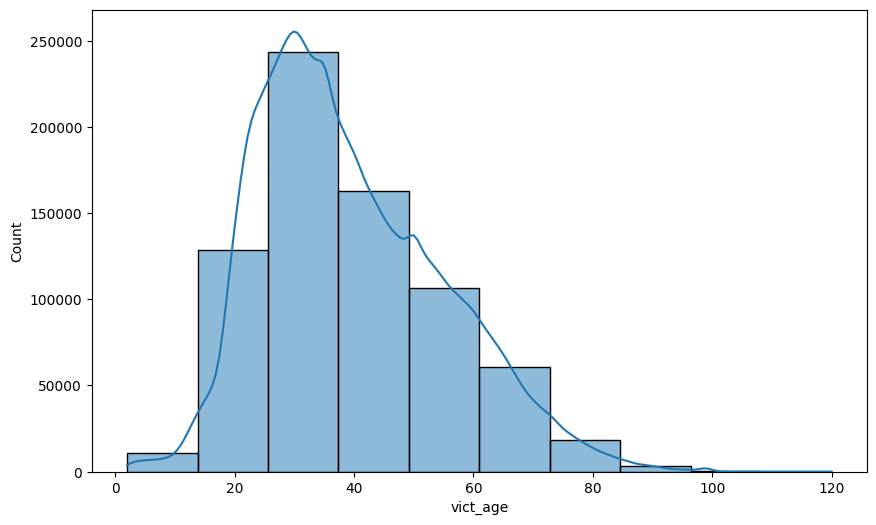

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
crime_lapd = crime_lapd[crime_lapd["vict_age"] > 0]
sns.histplot(x="vict_age", data=crime_lapd, kde=True, bins=10)
plt.show()

<Axes: xlabel='vict_sex', ylabel='count'>

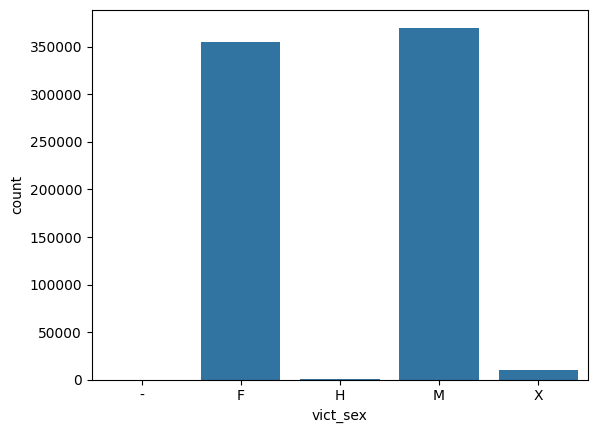

In [11]:
sns.countplot(x="vict_sex", data=crime_lapd)

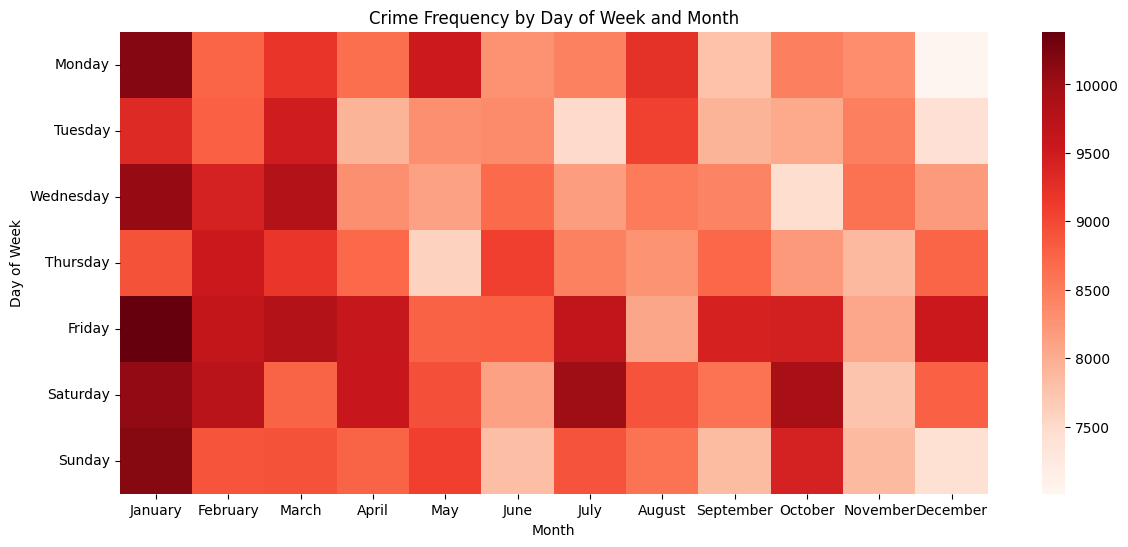

In [12]:
crime_lapd['day_of_week'] = crime_lapd['date_occ'].dt.day_name()
crime_lapd['month_name'] = crime_lapd['date_occ'].dt.month_name()
seasonality = crime_lapd.pivot_table(
    index='day_of_week',
    columns='month_name',
    values='dr_no',
    aggfunc='count'
)

seasonality = seasonality.reindex([
    'Monday','Tuesday','Wednesday','Thursday',
    'Friday','Saturday','Sunday'
])

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

seasonality = seasonality[month_order]

plt.figure(figsize=(14,6))
sns.heatmap(seasonality, cmap='Reds')
plt.title("Crime Frequency by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()


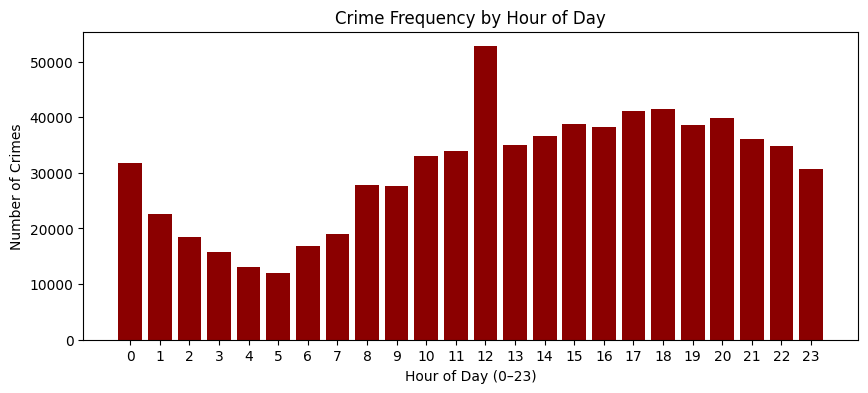

In [13]:
crime_lapd['hour'] = crime_lapd['date_occ'].dt.hour
crimes_by_hour = crime_lapd.groupby('hour').size()

plt.figure(figsize=(10,4))
plt.bar(crimes_by_hour.index, crimes_by_hour.values, color='darkred')
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.show()

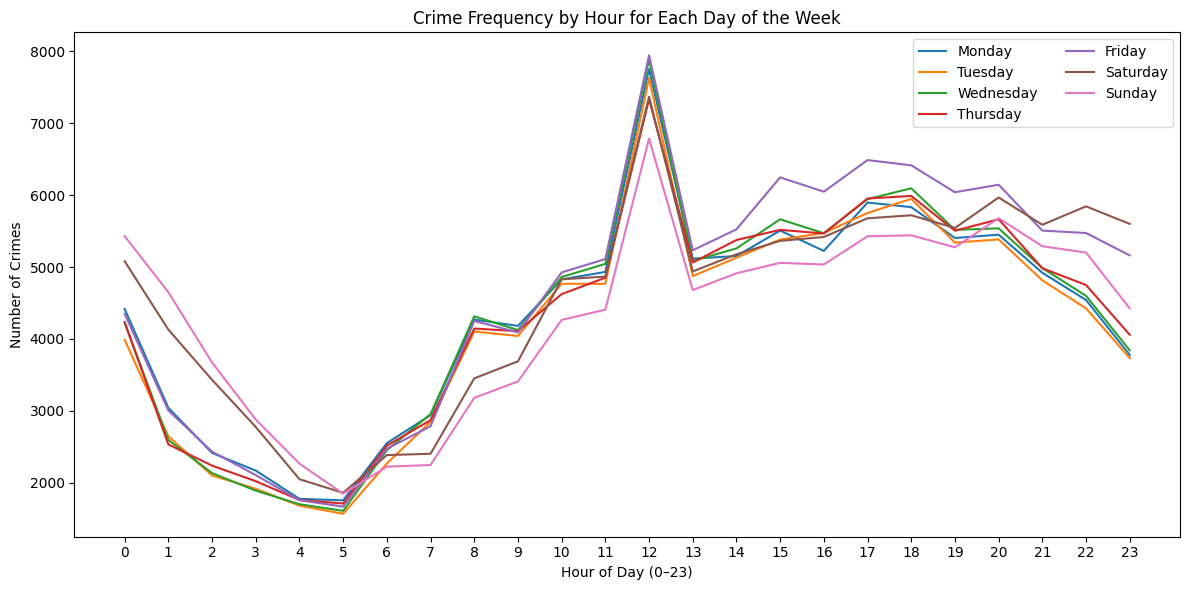

In [14]:
crime_lapd['day_of_week'] = crime_lapd['date_occ'].dt.day_name()
crime_lapd['hour'] = crime_lapd['date_occ'].dt.hour
hour_day = crime_lapd.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hour_day['day_of_week'] = pd.Categorical(hour_day['day_of_week'], categories=day_order, ordered=True)

plt.figure(figsize=(12,6))

for day in day_order:
    subset = hour_day[hour_day['day_of_week'] == day]
    plt.plot(subset['hour'], subset['count'], label=day)

plt.title("Crime Frequency by Hour for Each Day of the Week")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_21792\1469641126.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['age_group', 'vict_sex']).size().reset_index(name='count')


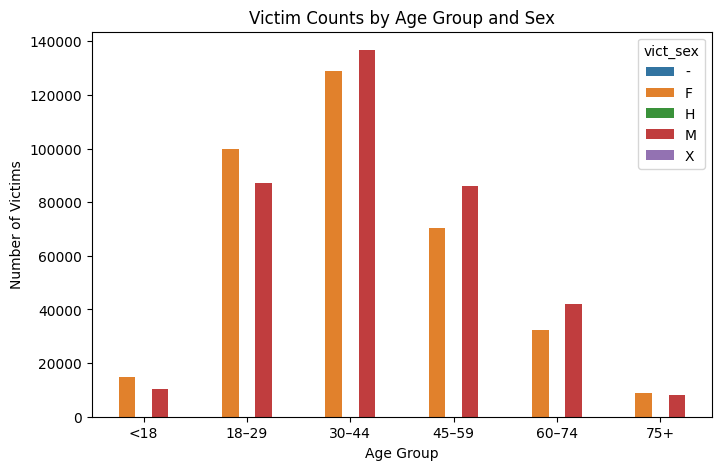

In [15]:
df = crime_lapd.copy()

df = df[(df['vict_age'] > 0) & (df['vict_age'] <= 100)]
df = df[df['vict_sex'].isin(['M', 'F'])]

bins = [0, 17, 29, 44, 59, 74, 100]
labels = ['<18', '18–29', '30–44', '45–59', '60–74', '75+']

df['age_group'] = pd.cut(df['vict_age'], bins=bins, labels=labels)

age_sex_counts = df.groupby(['age_group', 'vict_sex']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(
    data=age_sex_counts,
    x='age_group',
    y='count',
    hue='vict_sex'
)

plt.title("Victim Counts by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.show()


C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14184\3278075742.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_trend_plot['count_smooth'] = crime_trend_plot['count'].rolling(3, center=True).mean()


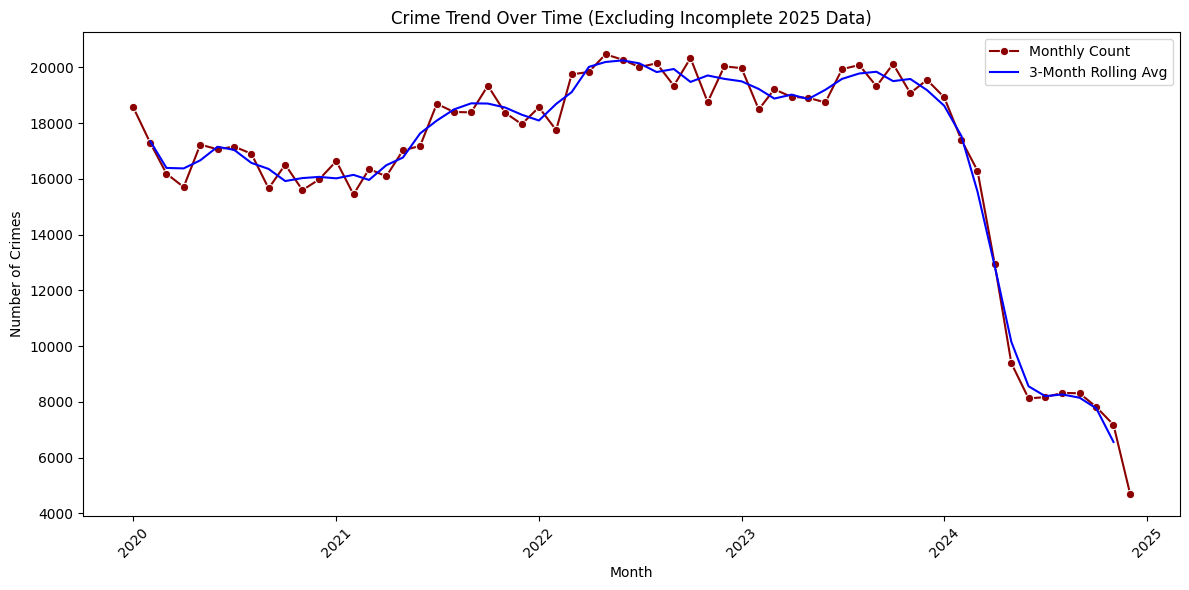

In [15]:
crime_lapd['year_month'] = crime_lapd['date_occ'].dt.to_period('M')
crime_trend = crime_lapd.groupby('year_month').size().reset_index(name='count')
crime_trend['year_month'] = crime_trend['year_month'].dt.to_timestamp()

# Proper cutoff
cutoff = pd.Timestamp('2025-01-01')
crime_trend_plot = crime_trend[crime_trend['year_month'] < cutoff]

# Rolling average on filtered data
crime_trend_plot['count_smooth'] = crime_trend_plot['count'].rolling(3, center=True).mean()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=crime_trend_plot, x='year_month', y='count', marker='o', label='Monthly Count', color='darkred')
sns.lineplot(data=crime_trend_plot, x='year_month', y='count_smooth', label='3-Month Rolling Avg', color='blue')

plt.title("Crime Trend Over Time (Excluding Incomplete 2025 Data)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14184\1988395177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")


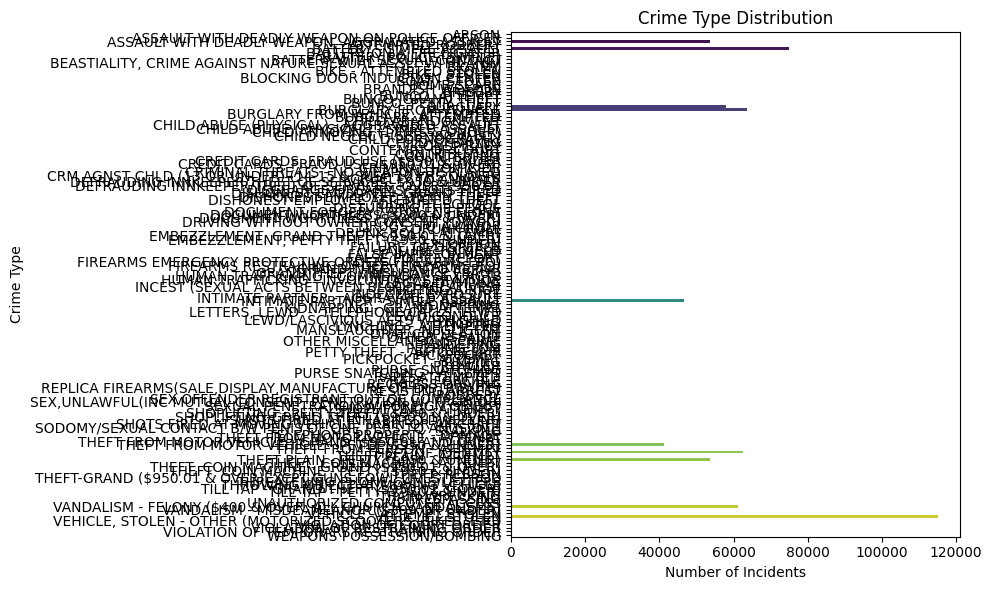

In [18]:
crime_counts = crime_lapd['crm_cd_desc'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette="viridis")
plt.title("Crime Type Distribution")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()

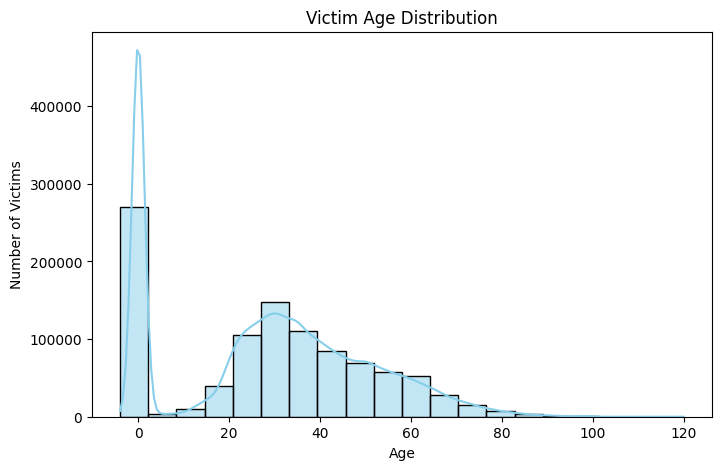

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(crime_lapd['vict_age'], bins=20, kde=True, color='skyblue')
plt.title("Victim Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14184\3981024040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crime_lapd, x='vict_sex', palette="pastel")


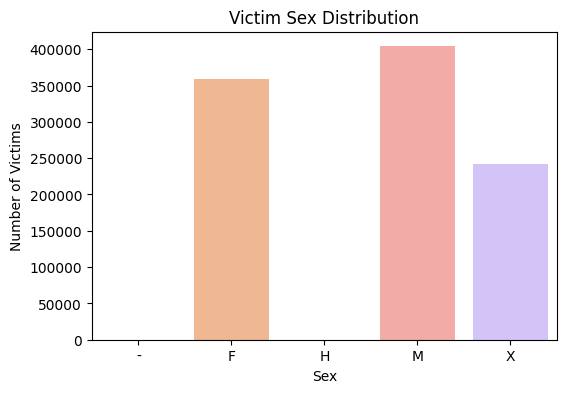

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=crime_lapd, x='vict_sex', palette="pastel")
plt.title("Victim Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Number of Victims")
plt.show()

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14184\340058013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crime_lapd, x='vict_descent', order=crime_lapd['vict_descent'].value_counts().index, palette="muted")


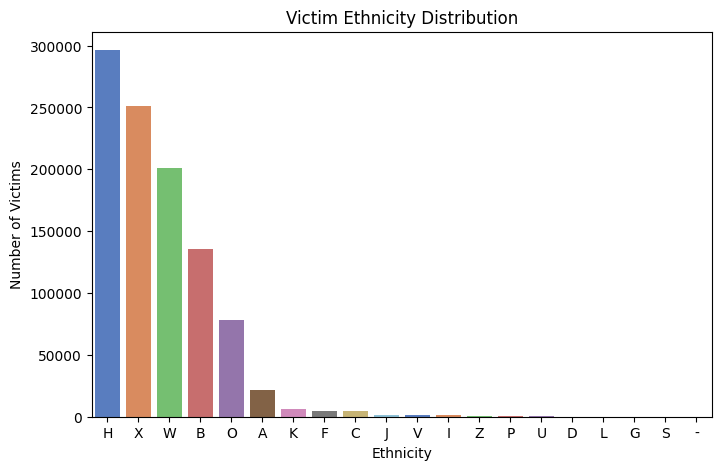

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=crime_lapd, x='vict_descent', order=crime_lapd['vict_descent'].value_counts().index, palette="muted")
plt.title("Victim Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Victims")
plt.show()


In [33]:
crime_lapd["crm_cd_desc"].unique()

['THEFT OF IDENTITY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND..., 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10..., ..., 'BLOCKING DOOR INDUCTION CENTER', 'INCITING A RIOT', 'DISHONEST EMPLOYEE ATTEMPTED THEFT', 'TRAIN WRECKING', 'DRUNK ROLL - ATTEMPT']
Length: 140
Categories (140, object): ['ARSON', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'ATTEMPTED ROBBERY', ..., 'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'WEAPONS POSSESSION/BOMBING']

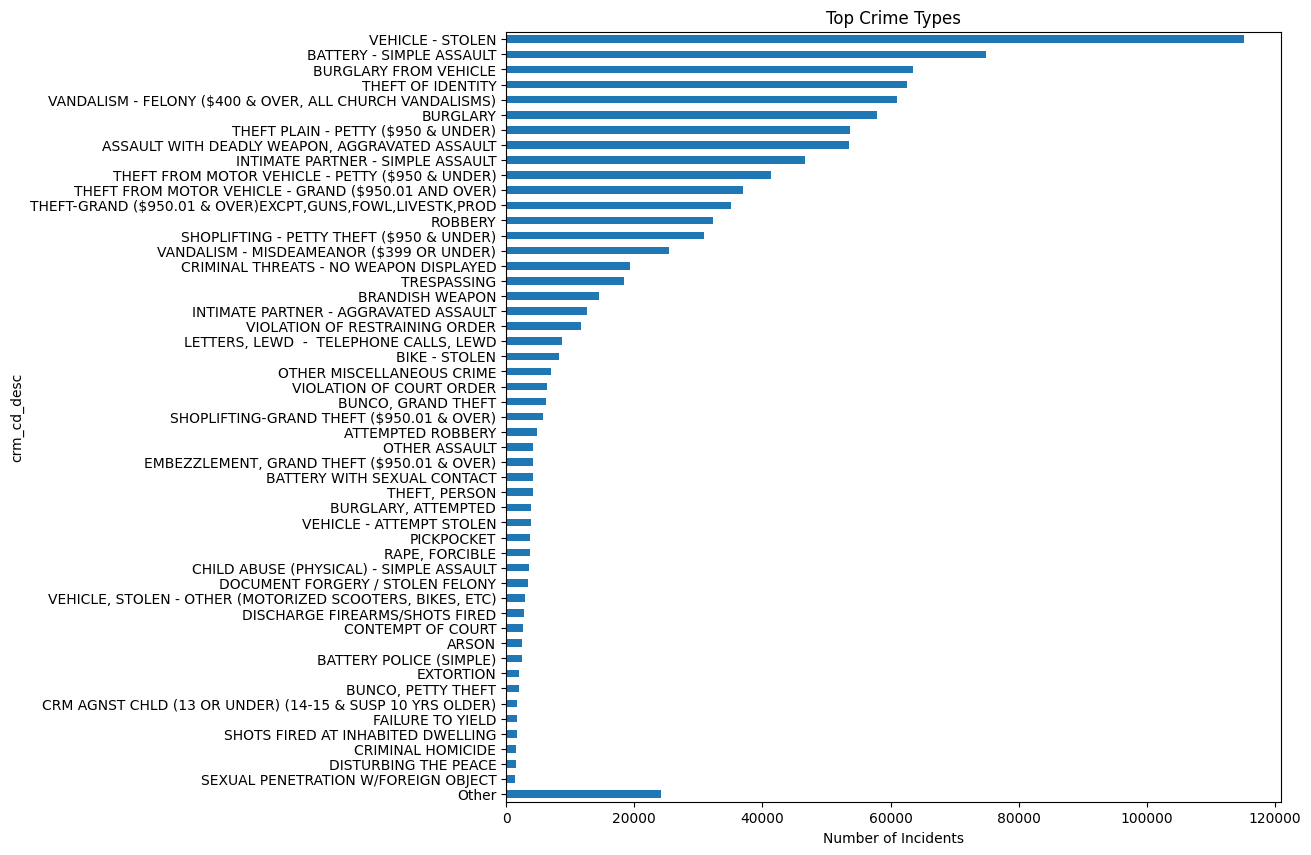

In [40]:
top_n = 50
crime_counts = crime_lapd['crm_cd_desc'].value_counts()
top_crimes = crime_counts[:top_n]
other_count = crime_counts[top_n:].sum()

# Combine top crimes with "Other"
top_crimes['Other'] = other_count

top_crimes.plot(kind='barh', figsize=(10,10))
plt.xlabel('Number of Incidents')
plt.title('Top Crime Types')
plt.gca().invert_yaxis()  # optional: highest on top
plt.show()

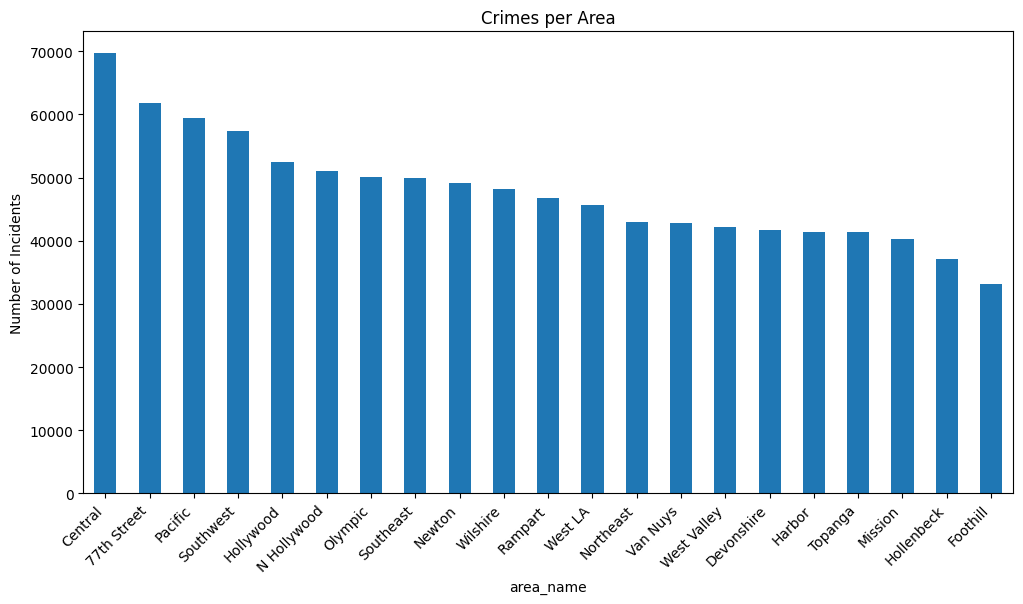

In [41]:
area_counts = crime_lapd['area_name'].value_counts()
area_counts.plot(kind='bar', figsize=(12,6))
plt.ylabel('Number of Incidents')
plt.title('Crimes per Area')
plt.xticks(rotation=45, ha='right')
plt.show()


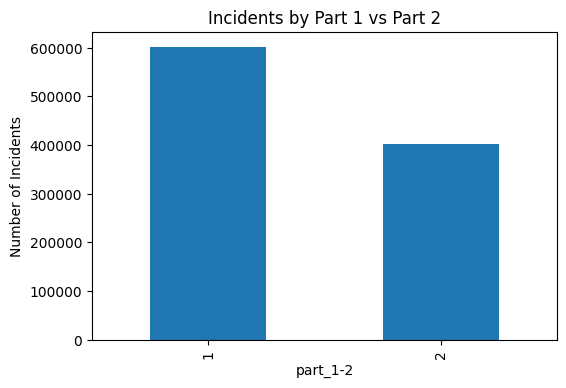

In [46]:
crime_lapd['part_1-2'].value_counts().plot(kind='bar', figsize=(6,4))
plt.ylabel('Number of Incidents')
plt.title('Incidents by Part 1 vs Part 2')
plt.show()


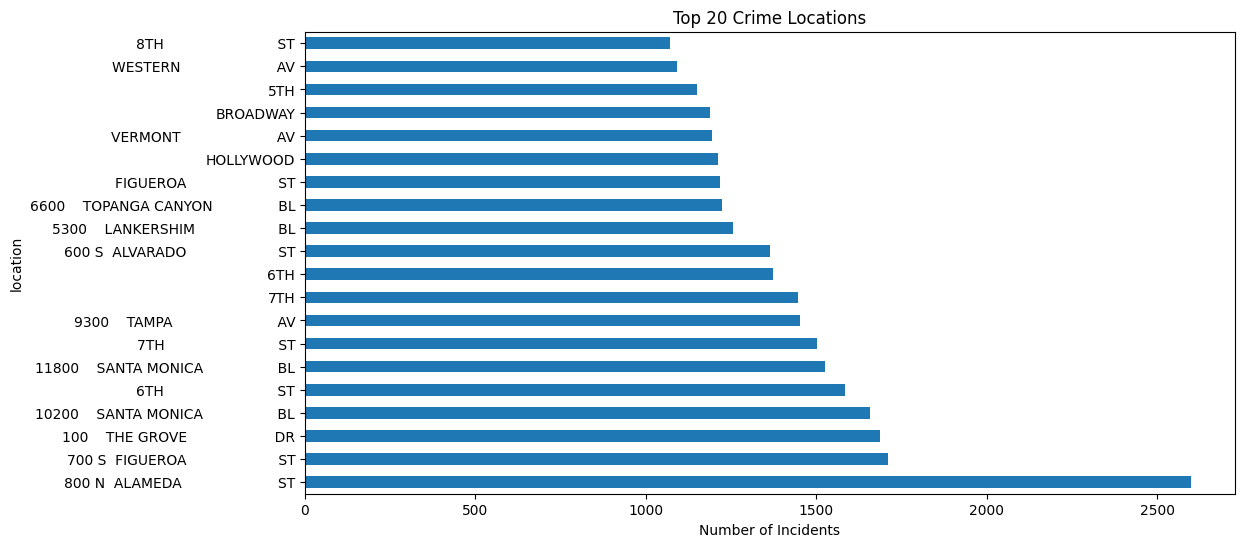

In [47]:
top_locations = crime_lapd['location'].value_counts().head(20)
top_locations.plot(kind='barh', figsize=(12,6))
plt.xlabel('Number of Incidents')
plt.title('Top 20 Crime Locations')
plt.show()


C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_14184\4048588350.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_crime = crime_lapd.groupby(['area_name', 'crime_group']).size().unstack(fill_value=0)


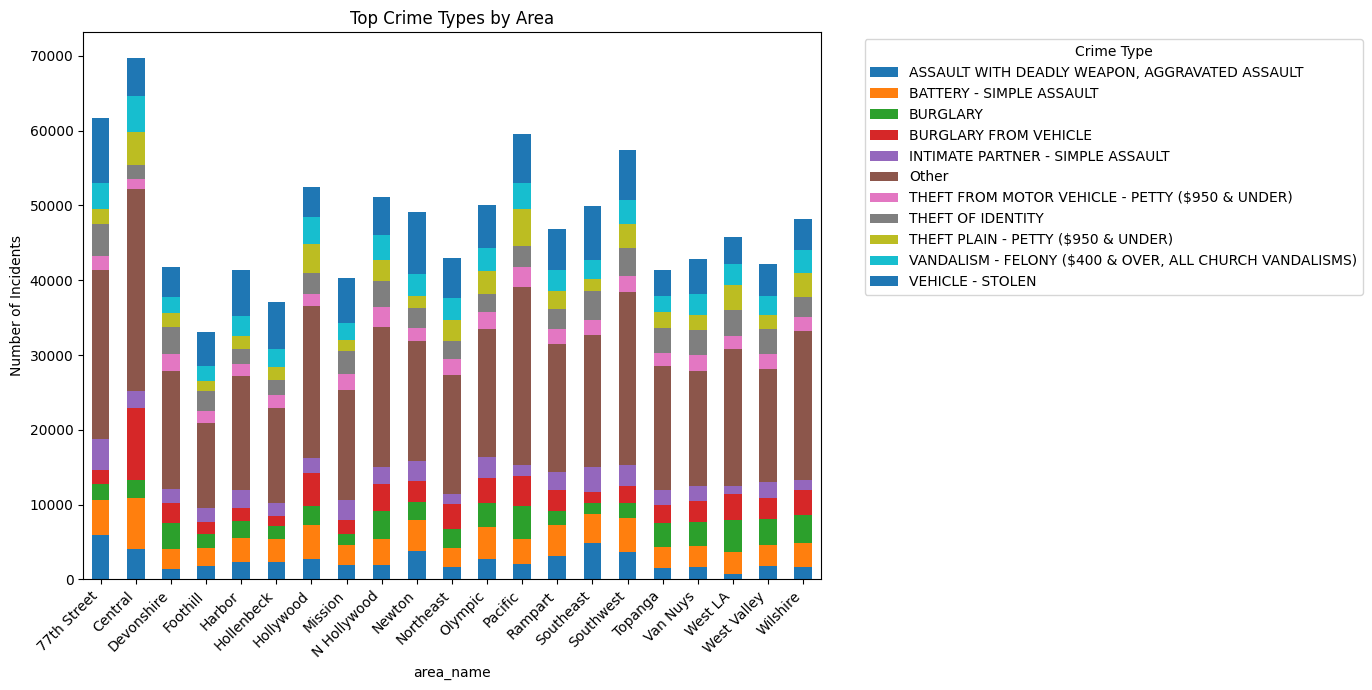

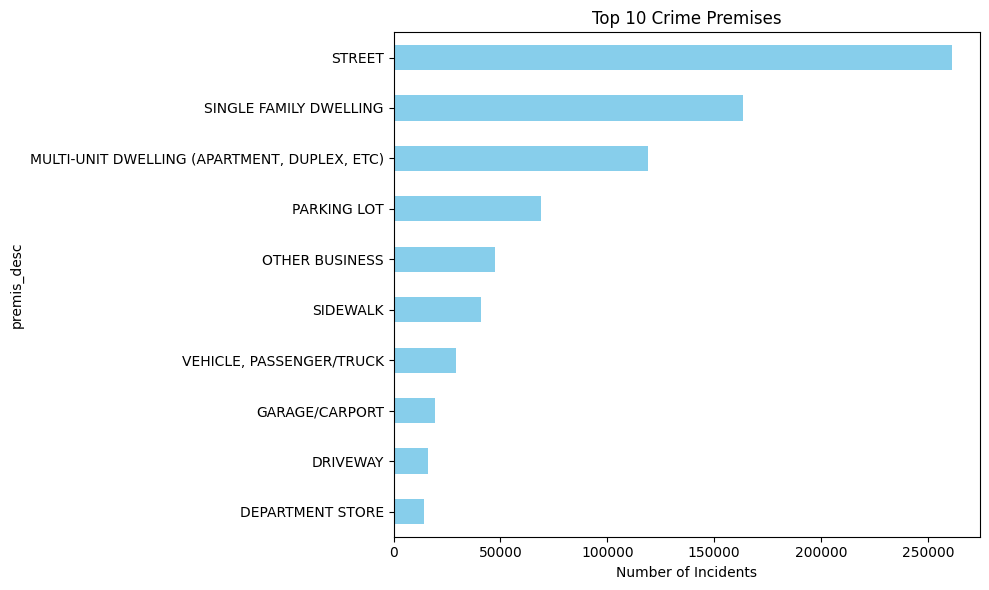

ValueError: Contour levels must be increasing

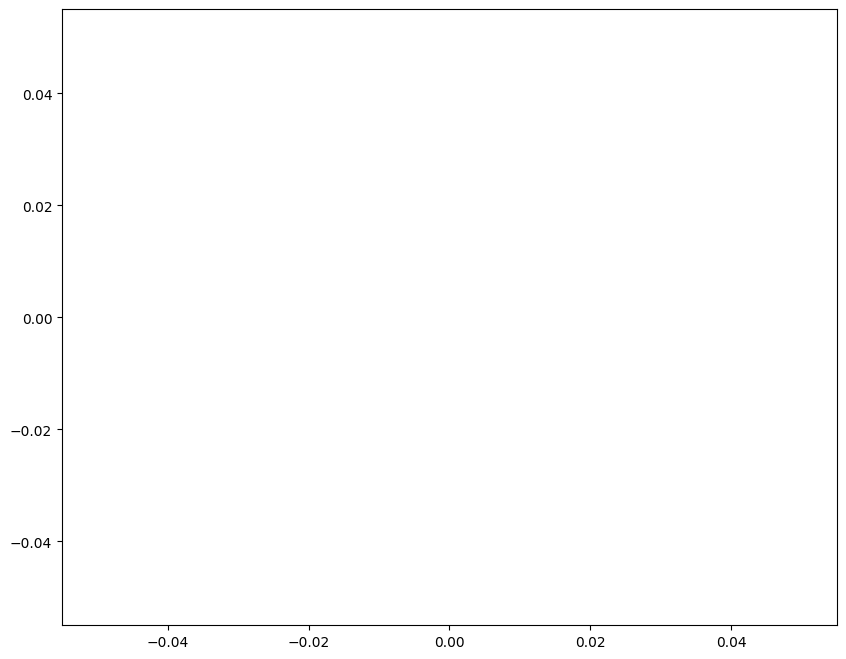

In [51]:
crime_lapd['lat'] = pd.to_numeric(crime_lapd['lat'], errors='coerce')
crime_lapd['lon'] = pd.to_numeric(crime_lapd['lon'], errors='coerce')

# Drop rows with missing lat/lon
crime_lapd = crime_lapd.dropna(subset=['lat', 'lon'])

top_n = 10
crime_counts = crime_lapd['crm_cd_desc'].value_counts()
top_crimes = crime_counts[:top_n]
crime_lapd['crime_group'] = crime_lapd['crm_cd_desc'].apply(lambda x: x if x in top_crimes.index else 'Other')
area_crime = crime_lapd.groupby(['area_name', 'crime_group']).size().unstack(fill_value=0)
area_crime.plot(kind='bar', stacked=True, figsize=(14,7))
plt.ylabel('Number of Incidents')
plt.title('Top Crime Types by Area')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

top_premises = crime_lapd['premis_desc'].value_counts().head(10)
top_premises.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Number of Incidents')
plt.title('Top 10 Crime Premises')
plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,8))
sns.kdeplot(
    x=crime_lapd['lon'], 
    y=crime_lapd['lat'], 
    fill=True, 
    cmap='Reds', 
    thresh=0.05, 
    levels=100
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Density Map')
plt.show()